<a href="https://colab.research.google.com/github/gshong-ai/PyTorch-/blob/main/2.1.pt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 변수의 shape, type, value 확인
def p(var) :
    if type(var)!=type([]):
        try: 
            print(f'Shape:{var.shape}')
        except : 
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}')

def pst(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}')

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import numpy as np
tf.__version__,keras.__version__

('2.4.1', '2.4.0')

## 2.1 Model 설계 workfolw

### 1. 첫번째 모델 만들기

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# 모델 정의
## Sequential model 사용
model = keras.models.Sequential()
## 레이어 추가 
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=10, activation='softmax'))
# 학습과정 설정 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
# 학습 
model.fit(x_train, y_train, epochs=3, batch_size=128)
# 시험
classes = model.predict(x_test)
p(classes)

Epoch 1/3
469/469 [==============================] - 1s 2ms/step - loss: 26.9786 - sparse_categorical_accuracy: 0.6993
Epoch 2/3
469/469 [==============================] - 1s 2ms/step - loss: 5.1101 - sparse_categorical_accuracy: 0.8781
Epoch 3/3
469/469 [==============================] - 1s 2ms/step - loss: 4.1617 - sparse_categorical_accuracy: 0.8836
Shape:(10000, 10)
Type: <class 'numpy.ndarray'>
Values: [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.6538445e-38]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.0047414e-15 ... 4.7930129e-27
  1.9520354e-23 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.4074920e-27
  0.0000000e+00 4.0457724e-34]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  4.1821397e-25 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [ ]:
# Epoch 1/3
# 469/469 [==============================] - 1s 1ms/step - loss: 479.2211 - accuracy: 0.7711
# Epoch 2/3
# 469/469 [==============================] - 1s 1ms/step - loss: 127.3708 - accuracy: 0.8665
# Epoch 3/3
# 469/469 [==============================] - 1s 1ms/step - loss: 126.8681 - accuracy: 0.8706

### 2. 모델을 만드는 세가지 방법

#### 2.1. Sequential model : Type 1

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# 모델 정의 : Sequential model 사용
model = keras.models.Sequential()
model.add(keras.Input(shape=(28,28)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(units=10, activation='softmax'))
# 모델 컨텐츠 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train option 설정 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# training 
# model.fit(x_train, y_train, epochs=3, batch_size=128)
history = model.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 1s 2ms/step - loss: 15.0578 - accuracy: 0.6791
Epoch 2/3
469/469 [==============================] - 1s 2ms/step - loss: 0.6830 - accuracy: 0.8171
Epoch 3/3
469/469 [==============================] - 1s 2ms/step - loss: 0.4226 - accuracy: 0.8904


In [ ]:
# 모델 정의 : Input Layer 제거 
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
def create_model1():
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dense(units=10, activation='softmax'))    
    return model 

model1 = create_model1()
model1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


#### 2.1. Sequential model : Type 2

 - layer를 Sequential method의 매개변수 list로 전달하는 방법

In [ ]:
model = keras.models.Sequential(
    [
        keras.Input(shape=(28,28)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax")
    ]
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


 - 모델의 layer graph를 보이고, 파일로 저장

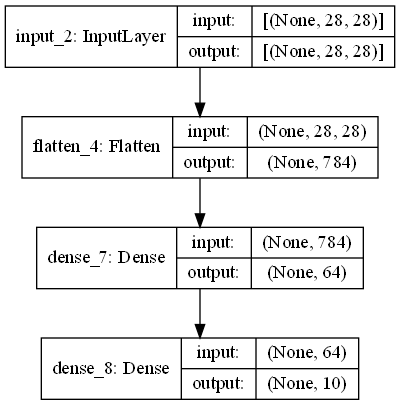

In [ ]:
keras.utils.plot_model(model,'model.png',show_shapes=True)

#### 2.2. Functional API 

In [ ]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_7 (Flatten)             (None, 784)          0           input_6[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 32)           25120       flatten_7[0][0]                  
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 32)           25120       flatten_7[0][0]                  
____________________________________________________________________________________________

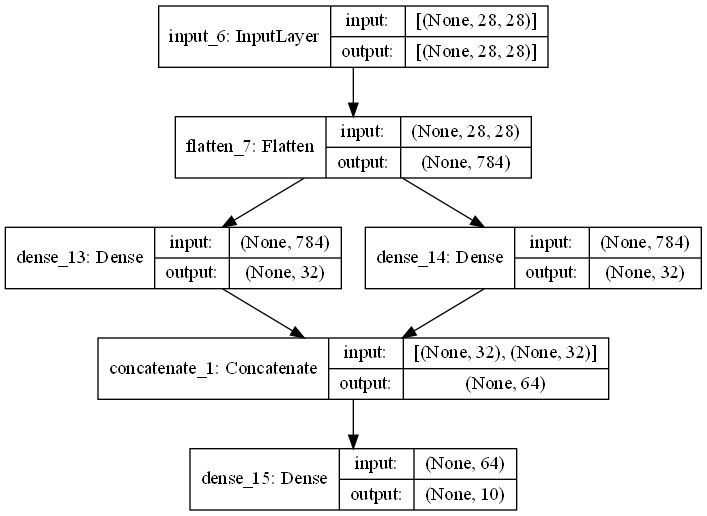

In [ ]:
# 1. DataFlow(Graph)정의
input_x = keras.Input(shape=(28,28))
x0 = layers.Flatten()(input_x)
x1 = layers.Dense(32, activation="relu")(x0)
x2 = layers.Dense(32, activation="relu")(x0)
#x1 = layers.Dense(32, activation="relu")(x0[:,:392])
#x2 = layers.Dense(32, activation="relu")(x0[:,392:])
x3 = layers.concatenate([x1, x2])
output_x = layers.Dense(10,activation="softmax")(x3)
# 2. 모델 인스턴스 : input,output으로 DataFlow를 추적
model = keras.Model(inputs=input_x, outputs=output_x)
model.summary()
keras.utils.plot_model(model,'model.png',show_shapes=True)

In [ ]:
# train option 설정 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# training 
# model.fit(x_train, y_train, epochs=3, batch_size=128)
history = model.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 1s 2ms/step - loss: 12.1021 - accuracy: 0.6647
Epoch 2/3
469/469 [==============================] - 1s 2ms/step - loss: 0.6884 - accuracy: 0.8422
Epoch 3/3
469/469 [==============================] - 1s 2ms/step - loss: 0.4714 - accuracy: 0.8813


- show_shapes=Treu : 입출력 텐서의 shape을 보여줌

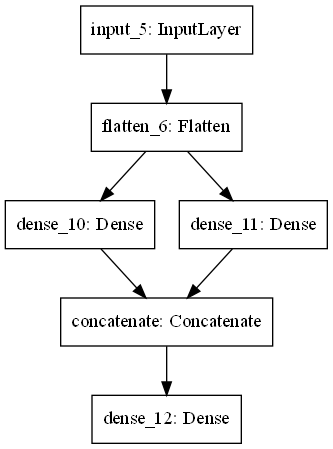

In [ ]:
keras.utils.plot_model(model,'model.png')#,show_shapes=True)

In [ ]:
def create_model2():
    input_x = keras.Input(shape=(28,28))
    x0 = layers.Flatten()(input_x)
    x1 = layers.Dense(32, activation="relu")(x0)
    x2 = layers.Dense(32, activation="relu")(x0)
    x3 = layers.concatenate([x1, x2])
    output_x = layers.Dense(10,activation="softmax")(x3)
    # 2. 모델 인스턴스 : input,output으로 DataFlow를 추적
    model = keras.Model(inputs=input_x, outputs=output_x)
    return model 

model2 = create_model2()
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_6 (Flatten)             (None, 784)          0           input_4[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 32)           25120       flatten_6[0][0]                  
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 32)           25120       flatten_6[0][0]                  
____________________________________________________________________________________________

#### 2.3. SubClassing API 

In [ ]:
class MyModel(keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = layers.Flatten()
        self.d1 = layers.Dense(32, activation="relu")
        self.d2 = layers.Dense(32, activation="relu")
        self.d3 = layers.Dense(10, activation="softmax")

    def call(self, x):
        x0 = self.flatten(x)
        x1 = self.d1(x0)
        x2 = self.d2(x0)
        c1 = layers.concatenate([x1, x2])
        return self.d3(c1)       

- 모델 인스턴스 생성후 사용

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          multiple                  0         
_________________________________________________________________
dense_16 (Dense)             multiple                  25120     
_________________________________________________________________
dense_17 (Dense)             multiple                  25120     
_________________________________________________________________
dense_18 (Dense)             multiple                  650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


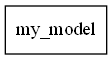

In [ ]:
# 1. model instance 
model = MyModel()
# 2. DataFlow(Graph)정의
input_x = keras.Input(shape=(28,28))
output_x = model(input_x)
model.summary()
## .utils.plot_model() : Sequntial/Functional API를 위한 것임  
keras.utils.plot_model(model,'model.png',show_shapes=True)

**Wrapping**

In [ ]:
def create_model3():
    model = MyModel()
    input_x = keras.Input(shape=(28,28))
    output_x = model(input_x)
    return model 

model3 = create_model3()
model3.summary()

Model: "my_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          multiple                  0         
_________________________________________________________________
dense_19 (Dense)             multiple                  25120     
_________________________________________________________________
dense_20 (Dense)             multiple                  25120     
_________________________________________________________________
dense_21 (Dense)             multiple                  650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### 3. 학습환경 설정 compile method

---
```python
compile(
    optimizer='rmsprop', loss=None, metrics=None, 
    loss_weights=None, weighted_metrics=None,..)
```
---

 - 내장함수의 'name'으로 지정하기 

---
```python
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy','mse'])
```
---

- 내장함수를 지정하기

---
```python
model.compile(optimizer=keras.optimizers.RMSprop(
                  learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()]) 
```
---

 - 내장함수 또는 사용자함수의 인스턴스로 지정하기 

---
```python
opt = keras.optimizers.Adam(learning_rate=0.01)
loss_fn = keras.losses.SparseCategoricalCrossentropy()
metric_fn = keras.metrics.Accuracy()

model.compile(loss=loss_fn, optimizer=opt, metrics=[metric_fn])
```
---

 - 내장함수의 파라메터가 복잡한 경우

---
```python
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
```
---

### 4. 모델 학습

---
```python
## default values
model.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1,
     callbacks=None, validation_split=0.0, validation_data=None,
     shuffle=True, initial_epoch=0, validation_freq=1,..)
```
---

- return으로 학습과정의 정보 받기

In [ ]:
# train option 설정 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'])
# training 
# model.fit(x_train, y_train, epochs=3, batch_size=128)
history = model.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 1s 2ms/step - loss: 15.1772 - accuracy: 0.7085 - mse: 27.4229
Epoch 2/3
469/469 [==============================] - 1s 2ms/step - loss: 0.8043 - accuracy: 0.8131 - mse: 27.3059
Epoch 3/3
469/469 [==============================] - 1s 2ms/step - loss: 0.5342 - accuracy: 0.8715 - mse: 27.3128


In [ ]:
history.history #Epoch별 loss, metric값

{'loss': [5.033965110778809, 0.7289586663246155, 0.5058720707893372],
 'accuracy': [0.7551000118255615, 0.831849992275238, 0.8773000240325928],
 'mse': [27.379961013793945, 27.374069213867188, 27.378639221191406]}

- 검증 데이터 사용해서 학습과정 모니터링 하기 

In [ ]:
history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/3
469/469 [==============================] - 1s 3ms/step - loss: 0.3989 - accuracy: 0.8997 - mse: 27.3813 - val_loss: 0.4596 - val_accuracy: 0.9018 - val_mse: 27.3284
Epoch 2/3
469/469 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.9134 - mse: 27.3834 - val_loss: 0.3862 - val_accuracy: 0.9110 - val_mse: 27.3293
Epoch 3/3
469/469 [==============================] - 1s 3ms/step - loss: 0.2857 - accuracy: 0.9236 - mse: 27.3845 - val_loss: 0.3556 - val_accuracy: 0.9207 - val_mse: 27.3302


In [ ]:
history.history

{'loss': [0.3988856077194214, 0.3324447274208069, 0.28570133447647095],
 'accuracy': [0.8996666669845581, 0.9134166836738586, 0.923633337020874],
 'mse': [27.38130760192871, 27.383398056030273, 27.384523391723633],
 'val_loss': [0.45962202548980713, 0.38617396354675293, 0.3556196093559265],
 'val_accuracy': [0.9017999768257141, 0.9110000133514404, 0.9207000136375427],
 'val_mse': [27.328384399414062, 27.32930564880371, 27.330169677734375]}

### 5. 모델 평가 

In [ ]:
#Test dataset에 대한 평균 loss, metric 
model.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5617 - accuracy: 0.4272 - mse: 27.2803


[1.5617111921310425, 0.42719998955726624, 27.280338287353516]

In [ ]:
# returen : loss + metrics 
values = model.evaluate(x=x_test, y=y_test, batch_size=1024,verbose=0)
p(values)

Type: <class 'list'>
Values: [1.5617116689682007, 0.42719998955726624, 27.280344009399414]


In [ ]:
p(values)

Type: <class 'list'>
Values: [1.5617116689682007, 0.42719998955726624, 27.280344009399414]


### 6. 모델 Test : Predict, Inference 

In [ ]:
y_predict = model.predict(x_test) 
p(y_predict[0,:])

Shape:(10,)
Type: <class 'numpy.ndarray'>
Values: [4.5318805e-38 1.9211622e-36 4.3251976e-28 5.3895437e-06 7.9521811e-08
 4.9528994e-09 1.4232975e-37 9.9999452e-01 0.0000000e+00 5.3591187e-10]


- category 값으로 변환하기: argmax() 가장큰값의 index를 반환

In [ ]:
import numpy as np
index = np.argmax(model.predict(x_test), axis=-1) 
p(index)
p(y_test)

Shape:(10000,)
Type: <class 'numpy.ndarray'>
Values: [7 2 1 ... 4 3 3]
Shape:(10000,)
Type: <class 'numpy.ndarray'>
Values: [7 2 1 ... 4 5 6]


### 7. 첫번째 모델 다시보기 

In [ ]:
## metric에 'mse' 추가 했음, 문제점은??  
import tensorflow.keras as keras
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# 모델 정의
## Sequential model 사용
model = keras.models.Sequential()
## 레이어 추가 
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=10, activation='softmax'))
# 학습과정 설정 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy','mse'])
# 학습 
model.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 1s 2ms/step - loss: 480.2382 - accuracy: 0.7737 - mse: 27.3195
Epoch 2/3
469/469 [==============================] - 1s 2ms/step - loss: 130.6360 - accuracy: 0.8649 - mse: 27.4209
Epoch 3/3
469/469 [==============================] - 1s 2ms/step - loss: 126.1851 - accuracy: 0.8707 - mse: 27.2878


In [ ]:
p(y_test)

Shape:(10000,)
Type: <class 'numpy.ndarray'>
Values: [7 2 1 ... 4 5 6]


In [ ]:
## MSE 값을 확인, why?? 
## 수정된 부분은? 
import tensorflow.keras as keras
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
y_train = tf.one_hot(y_train,depth=10) ##
y_test = tf.one_hot(y_test,depth=10)   ##

# 모델 정의
## Sequential model 사용
model = keras.models.Sequential()
## 레이어 추가 
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=10, activation='softmax'))
# 학습과정 설정 
model.compile(loss='categorical_crossentropy',  ##
              optimizer='sgd',
              metrics=['accuracy','mse'])
# 학습 
model.fit(x_train, y_train, epochs=3, batch_size=128)

Epoch 1/3
469/469 [==============================] - 1s 2ms/step - loss: 402.8699 - accuracy: 0.7753 - mse: 0.0449
Epoch 2/3
469/469 [==============================] - 1s 2ms/step - loss: 137.8766 - accuracy: 0.8612 - mse: 0.0277
Epoch 3/3
469/469 [==============================] - 1s 2ms/step - loss: 126.2746 - accuracy: 0.8697 - mse: 0.0260


**rank, shape, axis**

In [ ]:
## rank, shape, axis 
d = np.zeros((2,3,4))
print(d.ndim)  
p(d)
# #of_rank = 3
# shape=(2,3,4), 
# axis:(0,1,2) or (0,1,-1) 
#     (z, y, x)

3
Shape:(2, 3, 4)
Type: <class 'numpy.ndarray'>
Values: [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


### 8. 좀더 깊숙한 모델 다루기 

#### 1. compile method

default values

---
```python
model.compile(optimizer='rmsprop', loss=None, metrics=None, 
              loss_weights=None, weighted_metrics=None,.. )
```
---

- 내장된 함수, 알고리즘들

```python
# 내장 Optimizers 
class Adadelta: Optimizer that implements the Adadelta algorithm.
class Adagrad: Optimizer that implements the Adagrad algorithm.
class Adam: Optimizer that implements the Adam algorithm.
class Adamax: Optimizer that implements the Adamax algorithm.
class Ftrl: Optimizer that implements the FTRL algorithm.
class Nadam: Optimizer that implements the NAdam algorithm.
class Optimizer: Updated base class for optimizers.
class RMSprop: Optimizer that implements the RMSprop algorithm.
class SGD: Stochastic gradient descent and momentum optimizer.
```

``` python
#  내장 loss functions
class BinaryCrossentropy: Computes the cross-entropy loss between true labels and predicted labels.
class CategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.
class CategoricalHinge: Computes the categorical hinge loss between y_true and y_pred.
class CosineSimilarity: Computes the cosine similarity between y_true and y_pred.
class Hinge: Computes the hinge loss between y_true and y_pred.
class Huber: Computes the Huber loss between y_true and y_pred.
class KLDivergence: Computes Kullback-Leibler divergence loss between y_true and y_pred.
class LogCosh: Computes the logarithm of the hyperbolic cosine of the prediction error.
class Loss: Loss base class.
class MeanAbsoluteError: Computes the mean of absolute difference between labels and predictions.
class MeanAbsolutePercentageError: Computes the mean absolute percentage error between y_true and y_pred.
class MeanSquaredError: Computes the mean of squares of errors between labels and predictions.
class MeanSquaredLogarithmicError: Computes the mean squared logarithmic error between y_true and y_pred.
class Poisson: Computes the Poisson loss between y_true and y_pred.
class Reduction: Types of loss reduction.
class SparseCategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.
class SquaredHinge: Computes the squared hinge loss between y_true and y_pred.
```

```python
# 내장 metric functions
class AUC: Computes the approximate AUC (Area under the curve) via a Riemann sum.
class Accuracy: Calculates how often predictions equals labels.
class BinaryAccuracy: Calculates how often predictions matches binary labels.
class BinaryCrossentropy: Computes the crossentropy metric between the labels and predictions.
class CategoricalAccuracy: Calculates how often predictions matches one-hot labels.
class CategoricalCrossentropy: Computes the crossentropy metric between the labels and predictions.
class CategoricalHinge: Computes the categorical hinge metric between y_true and y_pred.
class CosineSimilarity: Computes the cosine similarity between the labels and predictions.
class FalseNegatives: Calculates the number of false negatives.
class FalsePositives: Calculates the number of false positives.
class Hinge: Computes the hinge metric between y_true and y_pred.
class KLDivergence: Computes Kullback-Leibler divergence metric between y_true and y_pred.
class LogCoshError: Computes the logarithm of the hyperbolic cosine of the prediction error.
class Mean: Computes the (weighted) mean of the given values.
class MeanAbsoluteError: Computes the mean absolute error between the labels and predictions.
class MeanAbsolutePercentageError: Computes the mean absolute percentage error between y_true and y_pred.
class MeanIoU: Computes the mean Intersection-Over-Union metric.
class MeanRelativeError: Computes the mean relative error by normalizing with the given values.
class MeanSquaredError: Computes the mean squared error between y_true and y_pred.
class MeanSquaredLogarithmicError: Computes the mean squared logarithmic error between y_true and y_pred.
class MeanTensor: Computes the element-wise (weighted) mean of the given tensors.
class Metric: Encapsulates metric logic and state.
class Poisson: Computes the Poisson metric between y_true and y_pred.
class Precision: Computes the precision of the predictions with respect to the labels.
class PrecisionAtRecall: Computes the precision at a given recall.
class Recall: Computes the recall of the predictions with respect to the labels.
class RecallAtPrecision: Computes the maximally achievable recall at a required precision.
class RootMeanSquaredError: Computes root mean squared error metric between y_true and y_pred.
class SensitivityAtSpecificity: Computes the sensitivity at a given specificity.
class SparseCategoricalAccuracy: Calculates how often predictions matches integer labels.
class SparseCategoricalCrossentropy: Computes the crossentropy metric between the labels and predictions.
class SparseTopKCategoricalAccuracy: Computes how often integer targets are in the top K predictions.
class SpecificityAtSensitivity: Computes the specificity at a given sensitivity.
class SquaredHinge: Computes the squared hinge metric between y_true and y_pred.
class Sum: Computes the (weighted) sum of the given values.
class TopKCategoricalAccuracy: Computes how often targets are in the top K predictions.
class TrueNegatives: Calculates the number of true negatives.
class TruePositives: Calculates the number of true positives.
```

함수 인스턴스로 compile 인수 설정하기 

---
```python
opt = keras.optimizers.Adam(learning_rate=0.01)
loss_fn = keras.losses.SparseCategoricalCrossentropy()
metric_fn = keras.metrics.Accuracy()

model.compile(loss=loss_fn, optimizer=opt, metrics=[metric_fn])
```
---

##### - 사용자 loss, metric함수 만들기

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

model = create_model1()

# loss 함수 만들기
def custom_mean_squared_error(y_true, y_pred):
    return tf.math.reduce_mean(tf.square(y_true - y_pred))
# metric 함수 만들기
def custom_mean_error(y_true, y_pred):
    return tf.math.reduce_mean(y_true - y_pred)

model.compile(optimizer=keras.optimizers.Adam(),
              loss=custom_mean_squared_error,
              metrics=['Accuracy',custom_mean_error])

# MSE 계산을 위해 레이블을 one-hot encoding 
y_train_one_hot = tf.one_hot(y_train, depth=10)
model.fit(x_train, y_train_one_hot, batch_size=64, epochs=3)

Epoch 1/3
938/938 [==============================] - 2s 2ms/step - loss: 0.1729 - accuracy: 0.8087 - custom_mean_error: -9.2817e-12
Epoch 2/3
938/938 [==============================] - 2s 2ms/step - loss: 0.1660 - accuracy: 0.8292 - custom_mean_error: 6.6361e-13
Epoch 3/3
938/938 [==============================] - 2s 2ms/step - loss: 0.1657 - accuracy: 0.8310 - custom_mean_error: -5.3816e-13


#### 2.  Fit method에서 callback사용하기

---
```python
## fit() arguments, default values 
Model.fit(
    x=None,                       # 입력 데이터
    y=None,                       # 대상 데이터
    batch_size=None,              # 그라디언트 업데이트 / 샘플 수
    epochs=1,                     # 모델을 훈련시킬 에포크 수
    verbose=1,                    # 0 = 무음, 1 = 진행률 표시 줄, 2 = 에포크 당 한 줄
    callbacks=None,               # keras.callbacks.Callback인스턴스 list   
    validation_split=0.0,         # 검증 데이터로 사용될 훈련 데이터의 비율
    validation_data=None,         # 각 에포크의 끝에서 모델 메트릭을 평가할 데이터
    shuffle=True,                 # 각 에포크 전에 훈련 데이터를 임의 순서로 섞을 것인지
    class_weight=None,            # 손실 함수의 가중치를 부여하는 데 사용, 부족한 클래스에 가중치 제공
    sample_weight=None,           # 손실 기능의 가중치를 부여하는 데 사용, 샘플들 간에 다른 가중치 제공
    initial_epoch=0,              # 훈련을 시작할 시점, 훈련을 재개하는 데 유용
    steps_per_epoch=None,         # 에포크의 완료를 선언할 배치의 수, 무한 반복되는 데이터 사용시 
    validation_steps=None,        # 검증의 완료를 선언할 배치의 수, 무한 반복되는 데이터 사용시 
    validation_batch_size=None,   # 검증 배치 당 샘플 수, 지정되지 않은 경우 batch_size
    validation_freq=1,            # 지정한 에포크끝에서 검증 수행, ( =5, =[1, 2, 10] )
    max_queue_size=10,            # generator 또는 Sequence 입력에만 사용, 최대 generator 큐
    workers=1,                    # generator 또는 Sequence입력에만 사용, 최대  프로세스기반 쓰레드
    use_multiprocessing=False,    # generator 또는 Sequence입력에만 사용, 최대  프로세스기반 쓰레드 
) 
```
---

- callback 사용하기 

다음과 같은 형태로 callback에 여러개의 함수를 적용할 수 있습니다.

---
```python
def scheduler(epoch, lr):
    if epoch < 10:  # 10, 20, 30, 50, ...
        return 0.001  # lr, 0.01, 0.001, ...
    else:
        return lr * tf.math.exp(0.002 * (10 - epoch))

my_callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5),
    keras.callbacks.LearningRateScheduler(scheduler),
    keras.callbacks.TensorBoard(log_dir='./logs'),
    keras.callbacks.ModelCheckpoint(filepath='./ckpt/cp.ckpt', 
                                    save_best_only=True, save_weights_only=False,), 
             ]
model.fit(x_train,y_train, epochs=100, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test)) 
```
---

In [ ]:
# 데이터 준비 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 
y_train = tf.one_hot(y_train,depth=10)
y_test = tf.one_hot(y_test,depth=10)

model = create_model1()

# compile option  
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

##### 1) EarlyStopping 

In [ ]:
# fit option : EarlyStoping 설정 
my_callbacks = [ keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=2), ]
model.fit(x_train,y_train, epochs=100, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test)) 

Epoch 1/100
59/59 [==============================] - 1s 11ms/step - loss: 0.5953 - accuracy: 0.9035 - val_loss: 0.8357 - val_accuracy: 0.8915
Epoch 2/100
59/59 [==============================] - 1s 10ms/step - loss: 0.5255 - accuracy: 0.9088 - val_loss: 0.8026 - val_accuracy: 0.8897
Epoch 3/100
59/59 [==============================] - 1s 10ms/step - loss: 0.4704 - accuracy: 0.9141 - val_loss: 0.7529 - val_accuracy: 0.8975
Epoch 4/100
59/59 [==============================] - 1s 10ms/step - loss: 0.4252 - accuracy: 0.9187 - val_loss: 0.7281 - val_accuracy: 0.8946
Epoch 5/100
59/59 [==============================] - 1s 10ms/step - loss: 0.3854 - accuracy: 0.9229 - val_loss: 0.7072 - val_accuracy: 0.9001
Epoch 6/100
59/59 [==============================] - 1s 10ms/step - loss: 0.3538 - accuracy: 0.9248 - val_loss: 0.6979 - val_accuracy: 0.9001
Epoch 7/100
59/59 [==============================] - 1s 10ms/step - loss: 0.3274 - accuracy: 0.9299 - val_loss: 0.6708 - val_accuracy: 0.9023
Epoch 

##### 2)LearningRateScheduler 

---
```python
epoch = 100

def scheduler(epoch):
    initial_lrate = 0.01
    if epoch < 10:  # 10, 20, 30, 50, ...
        return 0.01  # lr, 0.01, 0.001, ...
    else:
        return initial_lrate * tf.math.exp(0.03 * (10 - epoch))

my_callbacks = [ keras.callbacks.LearningRateScheduler(scheduler), ]
model.fit(x_train,y_train, epochs=20, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test)) 
```
---

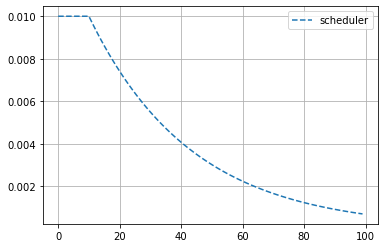

In [ ]:
import matplotlib.pylab as plt

epoch = 100

def scheduler(epoch):
    initial_lrate = 0.01
    if epoch < 10:  # 10, 20, 30, 50, ...
        return 0.01  # lr, 0.01, 0.001, ...
    else:
        return initial_lrate * tf.math.exp(0.03 * (10 - epoch))
        
lr=[]

for step in range(epoch):
    lr.append(scheduler(step))

plt.plot(lr, linestyle='--', label="scheduler")

plt.legend()
plt.grid()
plt.show()

ExponentialDecay

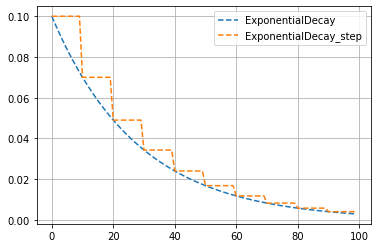

In [ ]:
def ExponentialDecay(step,staircase=False):
    initial_lrate = 0.1
    decay_steps = 10  
    decay_rate=0.7 
    if staircase :
        return initial_lrate * decay_rate ** (step // decay_steps)
    return initial_lrate * decay_rate ** (step / decay_steps)

lr=[]
lr_s=[]
for step in range(100):
    lr.append(ExponentialDecay(step,staircase=False))
    lr_s.append(ExponentialDecay(step,staircase=True))


import matplotlib.pylab as plt

plt.plot(lr, linestyle='--', label="ExponentialDecay")
plt.plot(lr_s, linestyle='--', label="ExponentialDecay_step")

plt.legend()
plt.grid()
plt.show()

PolynomialDecay

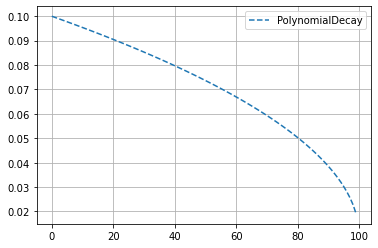

In [ ]:
def PolynomialDecay(step):
    initial_lrate = 0.1
    end_lrate = 0.01
    decay_steps = 100  # = epochs 
    power=0.5
    step = min(step, decay_steps)
    return (((initial_lrate - end_lrate) 
           * (1 - step / decay_steps) ** (power) ) + end_lrate)
  
lr=[]

for step in range(100):
    lr.append(PolynomialDecay(step))

plt.plot(lr, linestyle='--', label="PolynomialDecay")

plt.legend()
plt.grid()
plt.show()

InverseTimeDecay

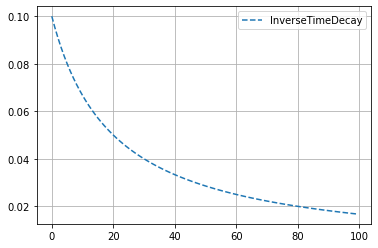

In [ ]:
def InverseTimeDecay(step):
    initial_lrate = 0.1
    decay_steps = 10
    decay_rate = 0.5

    return initial_lrate / (1 + decay_rate * step / decay_steps)

lr=[]
for step in range(100):
    lr.append(InverseTimeDecay(step))

plt.plot(lr, linestyle='--', label="InverseTimeDecay")

plt.legend()
plt.grid()
plt.show()

In [ ]:
# 데이터 준비 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 
# one hot encode target values
y_train = tf.one_hot(y_train,depth=10)
y_test = tf.one_hot(y_test,depth=10)
#x_train = x_train/255.  ##
#x_test = x_test/255.    ##



In [ ]:
model = create_model1()

initial_lrate = 0.005
# compile option  
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=initial_lrate),
              metrics=['accuracy']) 

## learning rate schdueler와 비교하기 위해서 저장
history1 = model.fit(x_train,y_train, epochs=50, batch_size=1024,
                      validation_data=(x_test, y_test), verbose=2 ) 

Epoch 1/50
59/59 - 1s - loss: 22.8250 - accuracy: 0.7079 - val_loss: 1.3098 - val_accuracy: 0.7097
Epoch 2/50
59/59 - 1s - loss: 1.0707 - accuracy: 0.7452 - val_loss: 0.9139 - val_accuracy: 0.7943
Epoch 3/50
59/59 - 1s - loss: 0.8072 - accuracy: 0.8375 - val_loss: 0.8617 - val_accuracy: 0.8453
Epoch 4/50
59/59 - 1s - loss: 0.5474 - accuracy: 0.8789 - val_loss: 0.4392 - val_accuracy: 0.9072
Epoch 5/50
59/59 - 1s - loss: 0.7162 - accuracy: 0.8964 - val_loss: 0.4102 - val_accuracy: 0.9089
Epoch 6/50
59/59 - 1s - loss: 0.3590 - accuracy: 0.9171 - val_loss: 0.4369 - val_accuracy: 0.9059
Epoch 7/50
59/59 - 1s - loss: 0.3557 - accuracy: 0.9207 - val_loss: 0.3831 - val_accuracy: 0.9171
Epoch 8/50
59/59 - 1s - loss: 0.3331 - accuracy: 0.9247 - val_loss: 0.6414 - val_accuracy: 0.8818
Epoch 9/50
59/59 - 1s - loss: 0.3034 - accuracy: 0.9293 - val_loss: 0.3694 - val_accuracy: 0.9292
Epoch 10/50
59/59 - 1s - loss: 0.2884 - accuracy: 0.9334 - val_loss: 0.3580 - val_accuracy: 0.9216
Epoch 11/50
59/59 

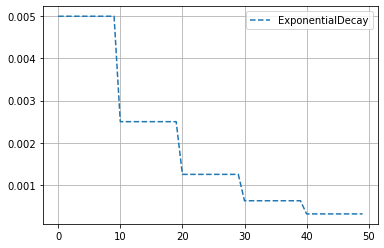

In [ ]:
def ExponentialDecay_s(step):
    initial_lrate = 0.005
    decay_steps = 10.  
    decay_rate=0.5
    return initial_lrate * decay_rate ** (step // decay_steps)

lr=[]
for step in range(50):
    lr.append(ExponentialDecay_s(step))

import matplotlib.pylab as plt

plt.plot(lr, linestyle='--', label="ExponentialDecay")

plt.legend()
plt.grid()
plt.show()

In [ ]:
model = create_model1()

# compile option  
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy']) 

my_callbacks = [ keras.callbacks.LearningRateScheduler(ExponentialDecay_s,verbose=1) ]
history2 = model.fit(x_train,y_train, epochs=50, batch_size=1024, callbacks=my_callbacks,
                      validation_data=(x_test, y_test), verbose=2) 

Epoch 1/50

Epoch 00001: LearningRateScheduler reducing learning rate to 0.005.
59/59 - 1s - loss: 29.9664 - accuracy: 0.6279 - val_loss: 1.2843 - val_accuracy: 0.6190
Epoch 2/50

Epoch 00002: LearningRateScheduler reducing learning rate to 0.005.
59/59 - 1s - loss: 1.1751 - accuracy: 0.6953 - val_loss: 1.1472 - val_accuracy: 0.7322
Epoch 3/50

Epoch 00003: LearningRateScheduler reducing learning rate to 0.005.
59/59 - 1s - loss: 0.7953 - accuracy: 0.8112 - val_loss: 0.6729 - val_accuracy: 0.8401
Epoch 4/50

Epoch 00004: LearningRateScheduler reducing learning rate to 0.005.
59/59 - 1s - loss: 0.5519 - accuracy: 0.8735 - val_loss: 0.6001 - val_accuracy: 0.8731
Epoch 5/50

Epoch 00005: LearningRateScheduler reducing learning rate to 0.005.
59/59 - 1s - loss: 0.4329 - accuracy: 0.8977 - val_loss: 0.3938 - val_accuracy: 0.9209
Epoch 6/50

Epoch 00006: LearningRateScheduler reducing learning rate to 0.005.
59/59 - 1s - loss: 0.3710 - accuracy: 0.9115 - val_loss: 0.4480 - val_accuracy: 0.90

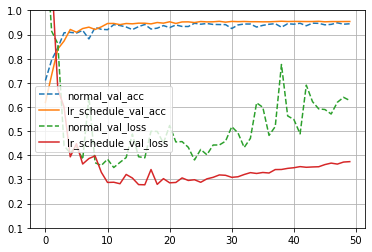

In [ ]:
import matplotlib.pylab as plt

plt.plot(history1.history['val_accuracy'], linestyle='--', label="normal_val_acc")
plt.plot(history2.history['val_accuracy'], linestyle='-', label="lr_schedule_val_acc")
plt.plot(history1.history['val_loss'], linestyle='--', label="normal_val_loss")
plt.plot(history2.history['val_loss'], linestyle='-', label="lr_schedule_val_loss")

plt.ylim(0.1, 1)
plt.legend()
plt.grid()
plt.show() 

![image.png](attachment:e22f5cd9-3818-40ea-84c2-b356f8a2a5a3.png) 

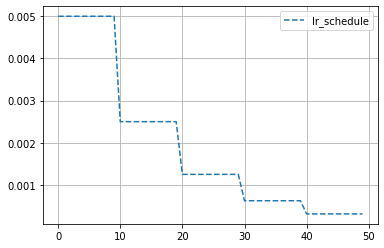

In [ ]:
plt.plot(history2.history['lr'], 
         linestyle='--', label="lr_schedule")
plt.legend()
plt.grid()
plt.show() 

---
```python
# 내장된 Scheduler함수들 
tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate, staircase=False, name=None
)
tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate, decay_steps, end_learning_rate=0.0001, power=1.0,
    cycle=False, name=None
)
tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate, decay_steps, decay_rate, staircase=False, name=None
)
```
---

- 내장함수로 lr scheduling 하기  

In [ ]:
# 1. DataFlow(Graph)정의
input_x = keras.Input(shape=(28,28))
x0 = layers.Flatten()(input_x)
x1 = layers.Dense(32, activation="relu")(x0)
x2 = layers.Dense(32, activation="relu")(x0)
x3 = layers.concatenate([x1, x2])
output_x = layers.Dense(10,activation="softmax")(x3)

# 2. 모델 인스턴스 : input,output으로 DataFlow를 추적
model = keras.Model(inputs=input_x, outputs=output_x)

lr_fn = keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate= 0.01,
                decay_steps=20,
                decay_rate=0.96,
                staircase=True)
# compile option  
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=lr_fn),
              metrics=['accuracy']) 

history2 = model.fit(x_train,y_train, epochs=20, batch_size=1024,
                      validation_data=(x_test, y_test), verbose=2) 

Epoch 1/20
59/59 - 1s - loss: 40.1135 - accuracy: 0.7447 - val_loss: 1.2108 - val_accuracy: 0.7792
Epoch 2/20
59/59 - 1s - loss: 1.2931 - accuracy: 0.6983 - val_loss: 0.9454 - val_accuracy: 0.6674
Epoch 3/20
59/59 - 1s - loss: 0.8769 - accuracy: 0.7554 - val_loss: 0.7406 - val_accuracy: 0.8208
Epoch 4/20
59/59 - 1s - loss: 0.6288 - accuracy: 0.8463 - val_loss: 0.4892 - val_accuracy: 0.8827
Epoch 5/20
59/59 - 1s - loss: 0.4444 - accuracy: 0.8924 - val_loss: 0.5573 - val_accuracy: 0.8989
Epoch 6/20
59/59 - 1s - loss: 0.3928 - accuracy: 0.9030 - val_loss: 0.3839 - val_accuracy: 0.9117
Epoch 7/20
59/59 - 1s - loss: 0.3292 - accuracy: 0.9192 - val_loss: 0.4095 - val_accuracy: 0.9152
Epoch 8/20
59/59 - 1s - loss: 0.2894 - accuracy: 0.9269 - val_loss: 0.3661 - val_accuracy: 0.9331
Epoch 9/20
59/59 - 1s - loss: 0.2633 - accuracy: 0.9342 - val_loss: 0.3593 - val_accuracy: 0.9357
Epoch 10/20
59/59 - 1s - loss: 0.2329 - accuracy: 0.9401 - val_loss: 0.4041 - val_accuracy: 0.9287
Epoch 11/20
59/59 

##### 3)callback함수로 텐서보드 연동하기 
> * 필요시 모델 초기화 
> * 필요시 이전 학습의 로그 삭제   
***code/logs 폴더 삭제해 주세요**

*Notebook내부에서 실행하기 : 설치환경의 영향을 많이 받음*
>#!rm -rf ./logs/    #colab(linux)    
>#*jupyter notebook 내에서 보기위해*   
>%load_ext tensorboard  
>#*로그 패스와 함께 텐서보드 실행*  
>%tensorboard --logdir ./logs  

*별도 브라우저에서 실행하기*
* 1) terminal window에서 실행
>tensorboard --logdir ./logs 
* 2) browser에서
>"localhost:6006/" 접속 

In [ ]:
path = !cd
print('tensorboard --logdir \''+path[0]+'\\logs\'')

tensorboard --logdir 'C:\Users\홍근선\ht3er-uvbrq\AI-camp_교제\2021\딥러닝심화2\code\logs'


http://localhost:6006/ 

In [ ]:
# 모델이 중복생성되지 않도록 clear 
keras.backend.clear_session()

model = create_model1()
# compile option  
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics='accuracy') 

#Tensorboard에 저장되는 정보가 모델별, fit별로 분리되도록 dir 생성 
import datetime
project = 'aicamp/1d'
log_dir = "./logs/"+ project + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

my_callbacks = [ keras.callbacks.TensorBoard(log_dir=log_dir) ]
history2 = model.fit(x_train,y_train, epochs=100, batch_size=1024,
                     callbacks=my_callbacks, validation_data=(x_test, y_test)) 

Epoch 1/100
59/59 [==============================] - 1s 13ms/step - loss: 29.0669 - accuracy: 0.5814 - val_loss: 5.3677 - val_accuracy: 0.8090
Epoch 2/100
59/59 [==============================] - 1s 9ms/step - loss: 3.5334 - accuracy: 0.8557 - val_loss: 1.7922 - val_accuracy: 0.8858
Epoch 3/100
59/59 [==============================] - 1s 9ms/step - loss: 1.4726 - accuracy: 0.8902 - val_loss: 1.0023 - val_accuracy: 0.8773
Epoch 4/100
59/59 [==============================] - 1s 9ms/step - loss: 0.7113 - accuracy: 0.8977 - val_loss: 0.6481 - val_accuracy: 0.8955
Epoch 5/100
59/59 [==============================] - 1s 9ms/step - loss: 0.4262 - accuracy: 0.9123 - val_loss: 0.5603 - val_accuracy: 0.9131
Epoch 6/100
59/59 [==============================] - 1s 9ms/step - loss: 0.3383 - accuracy: 0.9282 - val_loss: 0.4998 - val_accuracy: 0.9176
Epoch 7/100
59/59 [==============================] - 1s 9ms/step - loss: 0.2689 - accuracy: 0.9392 - val_loss: 0.4149 - val_accuracy: 0.9234
Epoch 8/100

##### 4)ModelCheckPoint 저장하기

 Parameters & default values


---
```python
keras.callbacks.ModelCheckpoint(
    filepath,               # 저장할 패스 
    save_weights_only=True, # 모델전체 or 가중치 
    monitor='val_acc',      # 기준 metric 
    mode='max',             # best의 조건(auto, min, max) 
    save_best_only=True)    # 개선된 경우만 저장 선택 
```
---

In [ ]:
# colab(linux)
#!rm -rf ./logs/*
#!rm -rf ./aicamp/*
# windows
# code/logs code/aicamp 폴더 삭제해 주세요

***code/aicamp 폴더 삭제해 주세요***

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 
y_train = tf.one_hot(y_train,depth=10)
y_test = tf.one_hot(y_test,depth=10)

def create_model():
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dense(units=10, activation='softmax'))    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']) 
    return model 

model = create_model()

- 모델 전체 저장하기

In [ ]:
# 모델 전체 저장하기 
project = '.\\aicamp\\'
checkpoint_path = project+"cp.ckpt" 

my_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,  
                                    save_weights_only=False ),
              ]
model.fit(x_train,y_train, epochs=3, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test)) 

Epoch 1/3
59/59 [==============================] - 1s 12ms/step - loss: 41.4241 - accuracy: 0.5288 - val_loss: 4.8166 - val_accuracy: 0.8520
INFO:tensorflow:Assets written to: .\aicamp\cp.ckpt\assets
Epoch 2/3
59/59 [==============================] - 1s 10ms/step - loss: 4.4258 - accuracy: 0.8605 - val_loss: 2.9793 - val_accuracy: 0.8749
INFO:tensorflow:Assets written to: .\aicamp\cp.ckpt\assets
Epoch 3/3
59/59 [==============================] - 1s 10ms/step - loss: 2.6747 - accuracy: 0.8823 - val_loss: 2.1978 - val_accuracy: 0.8890
INFO:tensorflow:Assets written to: .\aicamp\cp.ckpt\assets


In [ ]:
# 모델+가중치 읽어오기 
new_model = keras.models.load_model(checkpoint_path)
new_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.1978 - accuracy: 0.8890


[2.197810173034668, 0.8889999985694885]

- 가중치만 저장하기 

In [ ]:
# 가중치만 저장하기 
project = '.\\aicamp\\'
checkpoint_path = project+"cp.ckpt" 

my_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                    save_weights_only=True ),   
              ]
model.fit(x_train,y_train, epochs=3, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test)) 

Epoch 1/3
59/59 [==============================] - 1s 11ms/step - loss: 1.7344 - accuracy: 0.8978 - val_loss: 1.7029 - val_accuracy: 0.8951
Epoch 2/3
59/59 [==============================] - 1s 10ms/step - loss: 1.3306 - accuracy: 0.9079 - val_loss: 1.4641 - val_accuracy: 0.8976
Epoch 3/3
59/59 [==============================] - 1s 10ms/step - loss: 1.0579 - accuracy: 0.9146 - val_loss: 1.2596 - val_accuracy: 0.9052


In [ ]:
# 새로운 모델 생성
model = create_model()
model.evaluate(x_test,y_test)
# 훈련되지 않는 모델에 가중치를 load
model.load_weights(checkpoint_path) 
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2596 - accuracy: 0.9052


[1.2595725059509277, 0.9052000045776367]

- ckpt file 이름 지정하기 

In [ ]:
# ckpt file 이름 지정해서 저장하기 
project = '.\\aicamp\\'
checkpoint_path = project+"cp.{epoch:02d}-{val_accuracy:.4f}.ckpt" 

my_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                    save_weights_only=True ),   
              ]
model.fit(x_train,y_train, epochs=3, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test)) 

Epoch 1/3
59/59 [==============================] - 1s 11ms/step - loss: 0.8694 - accuracy: 0.9204 - val_loss: 1.0779 - val_accuracy: 0.9064
Epoch 2/3
59/59 [==============================] - 1s 11ms/step - loss: 0.7209 - accuracy: 0.9242 - val_loss: 0.9826 - val_accuracy: 0.9063
Epoch 3/3
59/59 [==============================] - 1s 10ms/step - loss: 0.6076 - accuracy: 0.9281 - val_loss: 0.8886 - val_accuracy: 0.9112


In [ ]:
!dir {project}

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 54B0-04FE

 C:\Users\홍근선\ht3er-uvbrq\AI-camp_교제\2021\딥러닝심화2\code\aicamp 디렉터리

2021-07-21  오후 02:12    <DIR>          .
2021-07-21  오후 02:12    <DIR>          ..
2021-07-21  오후 02:12                91 checkpoint
2021-07-21  오후 02:12           612,725 cp.01-0.9064.ckpt.data-00000-of-00001
2021-07-21  오후 02:12             1,202 cp.01-0.9064.ckpt.index
2021-07-21  오후 02:12           612,725 cp.02-0.9063.ckpt.data-00000-of-00001
2021-07-21  오후 02:12             1,202 cp.02-0.9063.ckpt.index
2021-07-21  오후 02:12           612,725 cp.03-0.9112.ckpt.data-00000-of-00001
2021-07-21  오후 02:12             1,202 cp.03-0.9112.ckpt.index
2021-07-21  오후 02:06    <DIR>          cp.ckpt
2021-07-21  오후 02:10           612,765 cp.ckpt.data-00000-of-00001
2021-07-21  오후 02:10             1,202 cp.ckpt.index
               9개 파일           2,455,839 바이트
               3개 디렉터리  783,443,857,408 바이트 남음


In [ ]:
model = create_model()
# file 이름으로 지정해서 읽어오기  
model.load_weights(project+'cp.03-0.9112.ckpt')
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 1.0009 - accuracy: 0.8995


[0.8885881900787354, 0.9111999869346619]

###### Checkpoint 이외의 모델 저장 방법 

- 1. model.save

In [ ]:
# 전체 모델(가중치, 학습환경-compile)을 파일로 저장 (Folder생성,SavedModel포멧 저장)
model.save(project+'model_save')      # model.save_weight( ) #W저장                   
keras.models.save_model(model, project+'save_model')  
model.save(project+"model_save.hdf5") # HDF5 파일로 저장 #Subclassed model은 Error!! 

INFO:tensorflow:Assets written to: .\aicamp\model_save\assets
INFO:tensorflow:Assets written to: .\aicamp\save_model\assets


In [ ]:
#ls
!dir {project}

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 54B0-04FE

 C:\Users\홍근선\ht3er-uvbrq\AI-camp_교제\2021\딥러닝심화2\code\aicamp 디렉터리

2021-07-21  오후 02:20    <DIR>          .
2021-07-21  오후 02:20    <DIR>          ..
2021-07-21  오후 02:12                91 checkpoint
2021-07-21  오후 02:12           612,725 cp.01-0.9064.ckpt.data-00000-of-00001
2021-07-21  오후 02:12             1,202 cp.01-0.9064.ckpt.index
2021-07-21  오후 02:12           612,725 cp.02-0.9063.ckpt.data-00000-of-00001
2021-07-21  오후 02:12             1,202 cp.02-0.9063.ckpt.index
2021-07-21  오후 02:12           612,725 cp.03-0.9112.ckpt.data-00000-of-00001
2021-07-21  오후 02:12             1,202 cp.03-0.9112.ckpt.index
2021-07-21  오후 02:06    <DIR>          cp.ckpt
2021-07-21  오후 02:10           612,765 cp.ckpt.data-00000-of-00001
2021-07-21  오후 02:10             1,202 cp.ckpt.index
2021-07-21  오후 02:20    <DIR>          model_save
2021-07-21  오후 02:20           635,008 model_save.hdf5
2021-07-21  오후 02:20    <DIR>          save_model
            

In [ ]:
#!ls  
#!dir /s/b {project}
#!ls ./*.hdf5
#!dir {project+'*.hdf5'}   

In [ ]:
# 포멧에따라 모델 복원하기 
# .hdf5 format : 최신 tf build에서 error / warning발생하는 경우가 있음
#model_3 = keras.models.load_model(project+'model_save.hdf5')
model_3 = keras.models.load_model(project+'save_model')
model_4 = keras.models.load_model(project+'model_save')
model_3.summary()
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
____________________________

- 2. model.save_model : model에 time tag 붙이기 

In [ ]:
import datetime

save_model_path = project+'my{}'.format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
keras.models.save_model(model, save_model_path)
print(save_model_path)

INFO:tensorflow:Assets written to: .\aicamp\my20210721-142220\assets
.\aicamp\my20210721-142220


In [ ]:
#ls $save_model_path
!dir {project+'my*'}

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 54B0-04FE

 C:\Users\홍근선\ht3er-uvbrq\AI-camp_교제\2021\딥러닝심화2\code\aicamp 디렉터리

2021-07-21  오후 02:22    <DIR>          my20210721-142220
               0개 파일                   0 바이트
               1개 디렉터리  783,433,355,264 바이트 남음


In [ ]:
model_4 = keras.models.load_model(save_model_path)
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


#### Custom Callback 만들기

---
```python
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
    def on_train_end(self, logs=None):
    def on_epoch_begin(self, epoch, logs=None):
    def on_epoch_end(self, epoch, logs=None):
    def on_batch_begin(self, batch, logs=None):
    def on_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print(f'Training : end of batch log keys: {keys}')
        loss = logs.get('loss')
        print(f'Training : loss : {loss}')
        
    def on_test_begin(self, logs=None):
    def on_test_end(self, logs=None):
    def on_predict_begin(self, logs=None):
    def on_predict_end(self, logs=None):
    def on_test_batch_begin(self, batch, logs=None):
    def on_test_batch_end(self, batch, logs=None):
    def on_predict_batch_begin(self, batch, logs=None):
    def on_predict_batch_end(self, batch, logs=None):
        
model.fit(callbacks=[ ])        
model.evaluate(callbacks=[ ])
model.predict(callbacks=[ ])
```
---

In [ ]:
# import tensorflow.keras as keras 
# from tensorflow.keras import layers
# # 데이터 준비 
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 

In [ ]:
# 모델 정의
model = keras.models.Sequential() 
model.add(layers.Flatten(input_shape=(28,28))) 
model.add(layers.Dense(units=10, activation='softmax')) 
# 훈련과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics='accuracy') 
# Custom callback 작성
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self,logs={}):
        self.losses = [] 

    def on_epoch_begin(self, epoch, logs=None):
        print(f'Epoch : {epoch}')

    def on_batch_end(self, batch, logs={}):
        loss = logs.get('loss')
        self.losses.append(loss)
        print(f'Batch:{batch}, loss:{loss}')
# callback 인스턴스         
b_history = LossHistory()
# 훈련 
history = model.fit(x_train, y_train, batch_size=1024, epochs=3,
          verbose=0, callbacks=[b_history])

Epoch : 0
Batch:0, loss:167.2736053466797
Batch:1, loss:156.20632934570312
Batch:2, loss:147.52259826660156
Batch:3, loss:139.54656982421875
Batch:4, loss:132.5135498046875
Batch:5, loss:126.04608917236328
Batch:6, loss:120.38378143310547
Batch:7, loss:115.84783172607422
Batch:8, loss:111.52520751953125
Batch:9, loss:107.42036437988281
Batch:10, loss:103.68595886230469
Batch:11, loss:100.13848114013672
Batch:12, loss:96.76005554199219
Batch:13, loss:93.63114929199219
Batch:14, loss:90.80500793457031
Batch:15, loss:87.91427612304688
Batch:16, loss:84.96556854248047
Batch:17, loss:82.44053649902344
Batch:18, loss:80.0290756225586
Batch:19, loss:77.77891540527344
Batch:20, loss:75.57048797607422
Batch:21, loss:73.48810577392578
Batch:22, loss:71.44253540039062
Batch:23, loss:69.70830535888672
Batch:24, loss:67.91704559326172
Batch:25, loss:66.29216003417969
Batch:26, loss:64.69293975830078
Batch:27, loss:63.31391525268555
Batch:28, loss:61.911922454833984
Batch:29, loss:60.60227584838867


In [ ]:
# local 변수 참조 
b_history.losses

[167.2736053466797,
 156.20632934570312,
 147.52259826660156,
 139.54656982421875,
 132.5135498046875,
 126.04608917236328,
 120.38378143310547,
 115.84783172607422,
 111.52520751953125,
 107.42036437988281,
 103.68595886230469,
 100.13848114013672,
 96.76005554199219,
 93.63114929199219,
 90.80500793457031,
 87.91427612304688,
 84.96556854248047,
 82.44053649902344,
 80.0290756225586,
 77.77891540527344,
 75.57048797607422,
 73.48810577392578,
 71.44253540039062,
 69.70830535888672,
 67.91704559326172,
 66.29216003417969,
 64.69293975830078,
 63.31391525268555,
 61.911922454833984,
 60.60227584838867,
 59.38998794555664,
 58.186771392822266,
 56.98274230957031,
 55.89437484741211,
 54.865455627441406,
 53.8899040222168,
 52.92677307128906,
 52.015472412109375,
 51.12871170043945,
 50.26689910888672,
 49.48976516723633,
 48.73743438720703,
 47.89004135131836,
 47.18577575683594,
 46.46866226196289,
 45.80412673950195,
 45.236698150634766,
 44.58149719238281,
 44.002288818359375,
 43.38

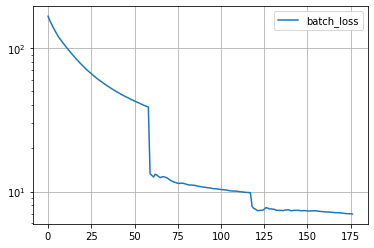

In [ ]:
plt.plot(b_history.losses, linestyle='-', label="batch_loss")

plt.semilogy()
plt.legend()
plt.grid()
plt.show() 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
history.history['loss']

[37.25935745239258, 8.992349624633789, 6.5627007484436035]